# Pandas
Pandas es una biblioteca de Python para análisis y manipulación de datos. Se basa en NumPy y proporciona estructuras de datos como Series y DataFrame.

In [2]:
import pandas as pd

## Series   

Una Series es un array unidimensional con etiquetas (índices). Es similar a un vector o lista, pero con más funcionalidades.

In [ ]:
data = [10, 20, 30, 40]
serie = pd.Series(data)
serie

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2860301692.py, line 3)

In [17]:
serie = pd.Series(data, index=["a", "b", "c", "d"])
serie


a    10
b    20
c    30
d    40
dtype: int64

In [18]:
print(serie['b'])  # 20
print(serie[1])    # 20
print(serie[1:3])  # b    20
                   # c    30
print(serie.a)
                     

20
20
b    20
c    30
dtype: int64
10


C:\Users\Usuario\AppData\Local\Temp\ipykernel_1232\2102272287.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(serie[1])    # 20


# DataFrames

Un DataFrame es una estructura bidimensional que funciona como una tabla, donde cada columna es una Series

## Crear y Manipular DataFrames
### Crear un DataFrame desde un diccionario

In [21]:
data = {
    'Nombre': ['Ana', 'Luis', 'Carlos'],
    'Edad': [25, 30, 28],
    'Ciudad': ['Madrid', 'Barcelona', 'Sevilla']
}
df = pd.DataFrame(data)
df



,Nombre,Edad,Ciudad
0,Ana,25,Madrid
1,Luis,30,Barcelona
2,Carlos,28,Sevilla


## Selección de Datos

### Seleccionar columnas

In [4]:
df['Nombre'] # Seleccionar una columna

0     Juan
1      Ana
2     Luis
3    Sofía
Name: Nombre, dtype: object

In [5]:
df[['Nombre', 'Ciudad']] # Seleccionar varias columnas

,Nombre,Ciudad
0,Juan,Madrid
1,Ana,Barcelona
2,Luis,Sevilla
3,Sofía,Valencia


### Seleccionar filas por índice

En pandas, `iloc` y `loc` son dos métodos utilizados para seleccionar datos de un DataFrame, pero tienen diferencias clave:

- **`iloc`**: Selección basada en la posición del índice.
    - Utiliza índices enteros para seleccionar filas y columnas.
    - Ejemplo: `df.iloc[0]` selecciona la primera fila del DataFrame.

- **`loc`**: Selección basada en la etiqueta del índice.
    - Utiliza etiquetas (nombres) para seleccionar filas y columnas.
    - Ejemplo: `df.loc[0]` selecciona la fila con la etiqueta 0 del DataFrame.

Ambos métodos son útiles para diferentes casos de uso y proporcionan flexibilidad al trabajar con DataFrames en pandas.


In [6]:
df.iloc[0] # Primera fila (indexación por posición)

Nombre      Juan
Edad          23
Ciudad    Madrid
Name: 0, dtype: object

In [7]:
df.loc[0]  # Primera fila (indexación por etiqueta)

Nombre      Juan
Edad          23
Ciudad    Madrid
Name: 0, dtype: object

In [ ]:
data = {'A': [10, 20, 30], 'B': [40, 50, 60], 'C': [70, 80, 90]}
dfGG = pd.DataFrame(data)
dfGG

,A,B,C
0,10,40,70
1,20,50,80
2,30,60,90


In [ ]:
print(dfGG.iloc[0, 1])  # 40

print(dfGG.loc[0, 'B'])  # 40

40
40


## Lectura y escritura de archivos

In [ ]:
# df = pd.read_csv('archivo.csv')
# df.to_csv('archivo.csv', index=False)

## Selección y filtrado de datos
### Selección por condición

In [22]:
# Filtrar filas donde la edad sea mayor que 25
print(df['Edad'] > 25)
type(df['Edad'] > 25)


0    False
1     True
2     True
Name: Edad, dtype: bool


pandas.core.series.Series

In [24]:
df_filtrado = df[df['Edad'] > 25]
df_filtrado

,Nombre,Edad,Ciudad
1,Luis,30,Barcelona
2,Carlos,28,Sevilla


### Selección por múltiples condiciones

In [ ]:
df_filtrado = df[(df['Edad'] > 25) & (df['Ciudad'] == 'Barcelona')]
df_filtrado


,Nombre,Edad,Ciudad
1,Luis,30,Barcelona


##  Operaciones y transformaciones
### Modificar columnas

In [24]:
df['Salario'] = [30000, 40000, 35000]
df


,Nombre,Edad,Ciudad,Salario
0,Ana,25,Madrid,30000
1,Luis,30,Barcelona,40000
2,Carlos,28,Sevilla,35000


In [ ]:
df['Edad'] = df['Edad'] + 1
df

,Nombre,Edad,Ciudad,Salario
0,Ana,26,Madrid,30000
1,Luis,31,Barcelona,40000
2,Carlos,29,Sevilla,35000


### Aplicar funciones
El método `apply` en pandas se utiliza para aplicar una función a lo largo de un eje de un DataFrame o Series. Es muy útil para realizar operaciones complejas en los datos de manera eficiente.

Por ejemplo, si queremos duplicar los valores de la columna 'Edad' en el DataFrame `df`, podemos usar `apply` de la siguiente manera:

In [25]:
df['Edad'] = df['Edad'].apply(lambda x: x * 2 + 1 if x > 30 else x)
df

,Nombre,Edad,Ciudad,Salario
0,Ana,25,Madrid,30000
1,Luis,30,Barcelona,40000
2,Carlos,28,Sevilla,35000


## Agrupación y agregación

In [ ]:
df_grouped = df.groupby('Ciudad')
df_grouped


In [26]:
df_grouped = df.groupby('Ciudad').agg({'Edad': ['mean', 'max']}) # Agregación de columnas por ciudad (media y máximo de edad)
df_grouped


Edad    
           mean max
Ciudad             
Barcelona  30.0  30
Madrid     25.0  25
Sevilla    28.0  28

## Manipulación de datos faltantes
Para manipular datos faltantes en pandas, se pueden utilizar varios métodos, como `isnull()`, `notnull()`, `dropna()`, y `fillna()`.

- **`isnull()`**: Devuelve un DataFrame de booleanos indicando si cada valor es nulo.
- **`notnull()`**: Devuelve un DataFrame de booleanos indicando si cada valor no es nulo.
- **`dropna()`**: Elimina las filas o columnas que contienen valores nulos.
- **`fillna()`**: Rellena los valores nulos con un valor especificado.


In [28]:
data_faltantes = {
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Marta'],
    'Edad': [25, None, None, 22],
    'Ciudad': ['Madrid', 'Barcelona', None, 'Valencia'],
    'Salario': [30000, 40000, None, 35000]
}
df_faltantes = pd.DataFrame(data_faltantes)
df_faltantes

,Nombre,Edad,Ciudad,Salario
0,Ana,25.0,Madrid,30000.0
1,Luis,NaN,Barcelona,40000.0
2,Carlos,NaN,None,NaN
3,Marta,22.0,Valencia,35000.0


In [29]:
df_faltantes.isnull()  # Comprobar valores nulos

,Nombre,Edad,Ciudad,Salario
0,False,False,False,False
1,False,True,False,False
2,False,True,True,True
3,False,False,False,False


In [30]:
df_faltantes.isnull().sum()

Nombre     0
Edad       2
Ciudad     1
Salario    1
dtype: int64

In [31]:
df_faltantes.fillna({'Edad': df_faltantes['Edad'].mean(), 'Ciudad': 'Desconocida', 'Salario': df_faltantes['Salario'].mean()}, inplace=True) 
# Rellenar valores nulos con la media de la columna Edad y Salario, y con 'Desconocida' la columna Ciudad inplace=True para modificar el DataFrame original 
df_faltantes


,Nombre,Edad,Ciudad,Salario
0,Ana,25.0,Madrid,30000.0
1,Luis,23.5,Barcelona,40000.0
2,Carlos,23.5,Desconocida,35000.0
3,Marta,22.0,Valencia,35000.0


# visualizacion de datos
Puedes usar `matplotlib.pyplot` para crear gráficos

In [32]:
import matplotlib.pyplot as plt
import numpy as np

### Gráfico de líneas

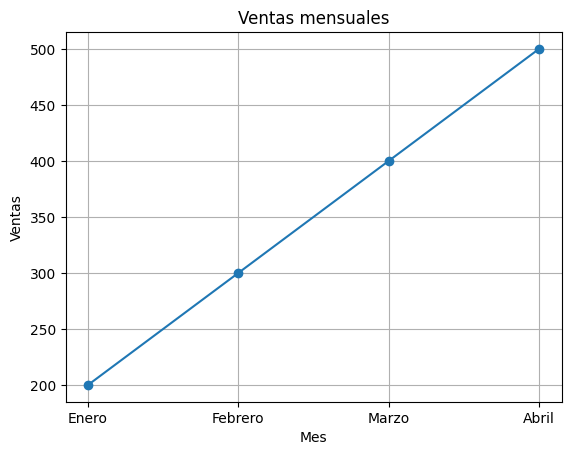

In [58]:
# Datos de ejemplo
df = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril'],
    'Ventas': [200, 300, 400, 500]
})

plt.plot(df['Mes'], df['Ventas'], marker='o', linestyle='-')
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()


### Gráfico de barras

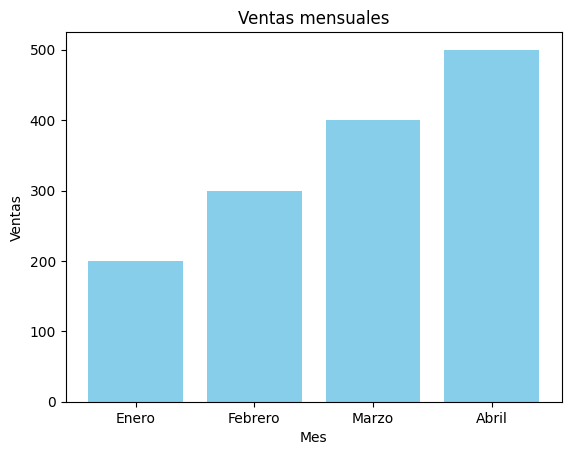

In [52]:
plt.bar(df['Mes'], df['Ventas'], color='skyblue')
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()


### Gráfico de sectores

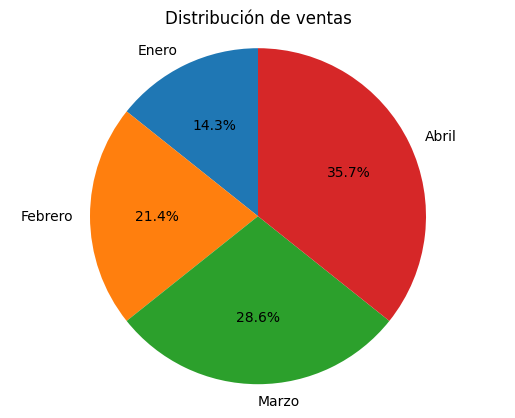

In [53]:
plt.pie(df['Ventas'], labels=df['Mes'], autopct='%1.1f%%', startangle=90)
plt.title('Distribución de ventas')
plt.axis('equal')  # Para que el gráfico sea un círculo perfecto
plt.show()


### Gráfico de dispersión

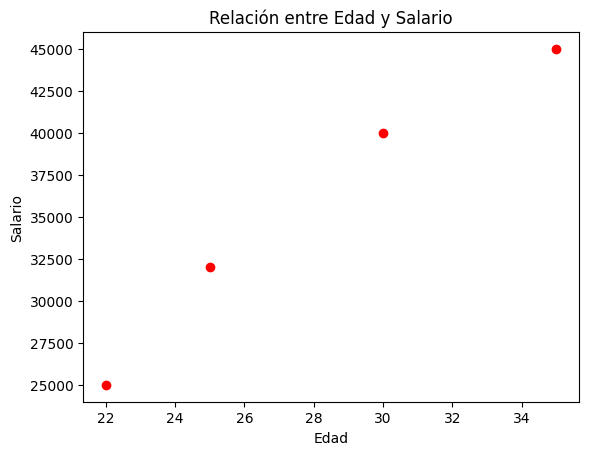

In [54]:
# Datos de ejemplo
df = pd.DataFrame({
    'Edad': [22, 25, 30, 35],
    'Salario': [25000, 32000, 40000, 45000]
})

plt.scatter(df['Edad'], df['Salario'], color='red')
plt.title('Relación entre Edad y Salario')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()


### Histograma

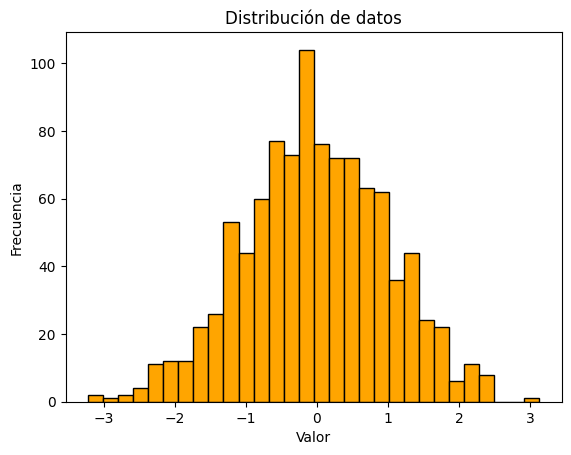

In [ ]:
data = np.random.randn(1000)

plt.hist(data, bins=30, color='orange', edgecolor='black')
plt.title('Distribución de datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


### Gráfico de caja y bigotes

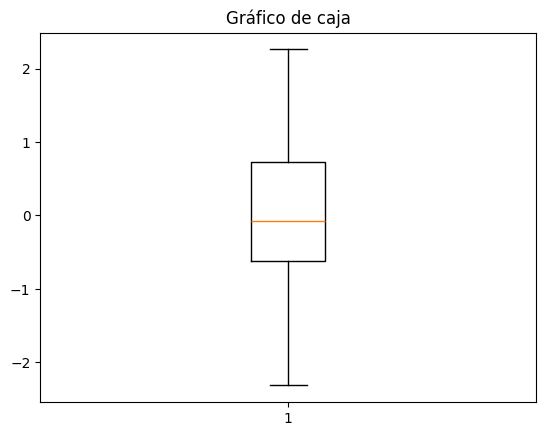

In [56]:
data = np.random.randn(100)

plt.boxplot(data)
plt.title('Gráfico de caja')
plt.show()
